## Libraries import

In [42]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split, ValidationCurveDisplay
from sklearn.preprocessing import MaxAbsScaler
from sklearn import tree, svm, neural_network
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.simplefilter("ignore", category=ConvergenceWarning)
warnings.simplefilter("ignore", category=FutureWarning)

## Data exploration

Load dataset.

In [2]:
cancer_data = pd.read_csv("The_Cancer_data_1500_V2.csv")

cancer_data.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


Dataset general statistical description.

In [3]:
cancer_data.describe()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


Correlations analisys.

Based on the correlations analysis we can conclude the following:
- There is no feature that correlates strongly enough with the objective value Diagnosis.
- PhisicalActivity holds no correlation with the Diagnosis.
- Contrary to what most people would think, GeneticRisk doesn't seem to have a strong correlation with the probability of being diagnoised with Cancer or not.
- The dataset probably will require some feature engineering work in order to create features that can have stronger correlations with the objective value.

In [4]:
correlations_matrix = cancer_data.corr()
correlations_matrix["Diagnosis"].sort_values(ascending=False)

Diagnosis           1.000000
CancerHistory       0.392188
GeneticRisk         0.253472
Gender              0.250336
Smoking             0.226999
AlcoholIntake       0.212772
Age                 0.196603
BMI                 0.187560
PhysicalActivity   -0.150089
Name: Diagnosis, dtype: float64

## Data visualization

Some of the hipotesis we want to prove trough data visualization are:
- Does cancer affect more to women than men?
- What's the age distribution of all the patients that were diagnosed with cancer?
- How many persons were diagnosed with cancer and also had a CancerHistory (Metastasis)?
- The amount of people that developed cancer having a low, medium and a high GeneticRisk
- How many persons that smoke develped cancer?
- How many persons that drink alcohol developed cancer?

Get only the positive examples of the dataset, so they can be used later for plotting.

In [5]:
positive_diagnosis = cancer_data[cancer_data["Diagnosis"] == 1]

# Copy by value not by reference to prevent any alterations to the original dataset
positive_diagnosis = positive_diagnosis.copy()

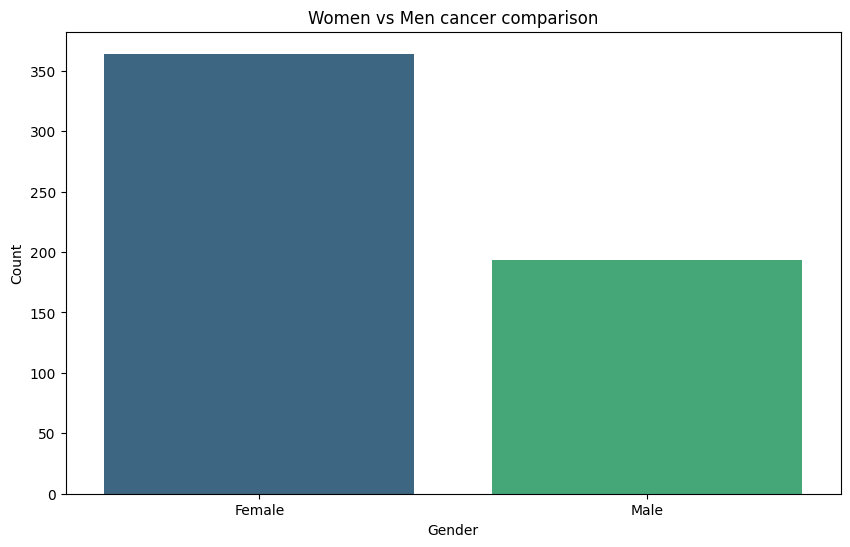

In [6]:
gender_mappings = {
    0: "Male",
    1: "Female"
}

if is_numeric_dtype(positive_diagnosis["Gender"]):
    positive_diagnosis["Gender"] = positive_diagnosis["Gender"].map(gender_mappings)


plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Gender", data=positive_diagnosis, hue=positive_diagnosis["Gender"], palette="viridis")
plt.title("Women vs Men cancer comparison")
plt.xlabel("Gender")
plt.ylabel("Count")

plt.show()

Conclusions: 
- Unfortunately, women have almost twice the chance to develop cancer, than men

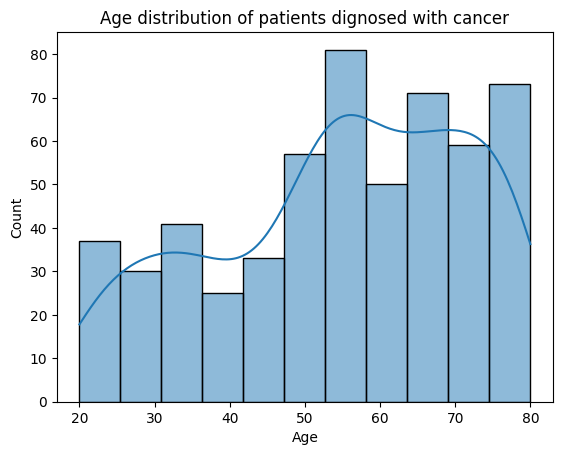

In [7]:
sns.histplot(positive_diagnosis["Age"], kde=True)

plt.title("Age distribution of patients dignosed with cancer")
plt.xlabel("Age")
plt.ylabel("Count")

plt.show()

Conclusions: 
- We see a peak in the number of people diagnosed with cancer after reaching age 50.
- The age group with the highest number of people diagnosed with cancer is 55, meaning that people at around age 55 have a higher chancer to be diagnosed with cancer. 

Text(0, 0.5, 'Count')

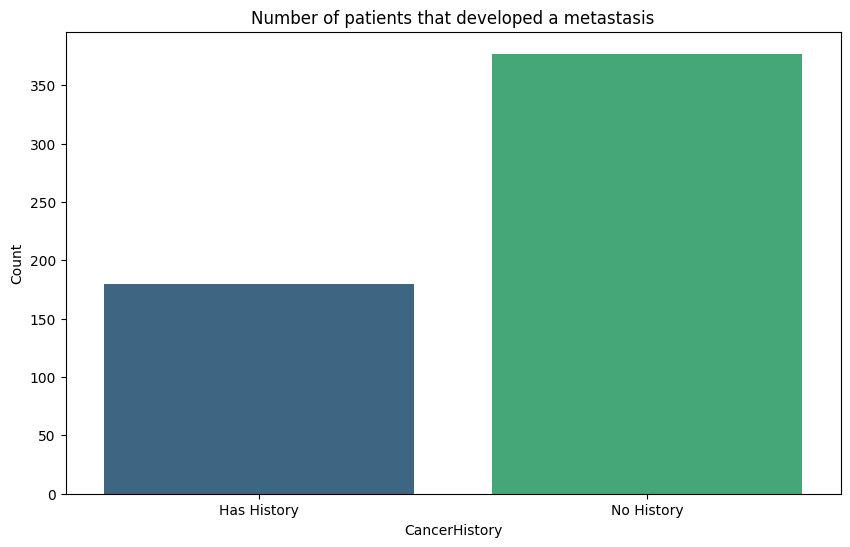

In [8]:
cancer_history_mappings = {
    0: "No History",
    1: "Has History"
}

if is_numeric_dtype(positive_diagnosis["CancerHistory"]):
    positive_diagnosis["CancerHistory"] = positive_diagnosis["CancerHistory"].map(cancer_history_mappings)

plt.figure(figsize=(10, 6))
ax = sns.countplot(x="CancerHistory", data=positive_diagnosis, hue=positive_diagnosis["CancerHistory"], palette="viridis")
plt.title("Number of patients that developed a metastasis")
plt.xlabel("CancerHistory")
plt.ylabel("Count")

Conclusions:
- More than twice as many patients with no history of cancer were diagnosed with cancer in this study.

Text(0, 0.5, 'Count')

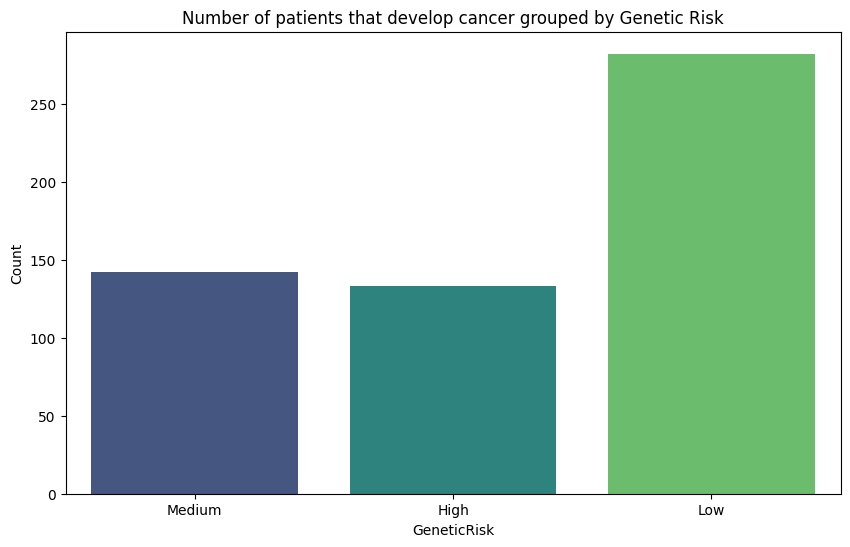

In [9]:
cancer_history_mappings = {
    0: "Low",
    1: "Medium",
    2: "High"
}

if is_numeric_dtype(positive_diagnosis["GeneticRisk"]):
    positive_diagnosis["GeneticRisk"] = positive_diagnosis["GeneticRisk"].map(cancer_history_mappings)

plt.figure(figsize=(10, 6))
ax = sns.countplot(x="GeneticRisk", data=positive_diagnosis, hue=positive_diagnosis["GeneticRisk"], palette="viridis")
plt.title("Number of patients that develop cancer grouped by Genetic Risk")
plt.xlabel("GeneticRisk")
plt.ylabel("Count")

Conclusion:
- People with low GeneticRisk seems to have more chances of developing cancer, than people with medium and high risk.
- As mentioned before, contraty to what most people would think, Genetic Risk doesn't seem to be a factor.

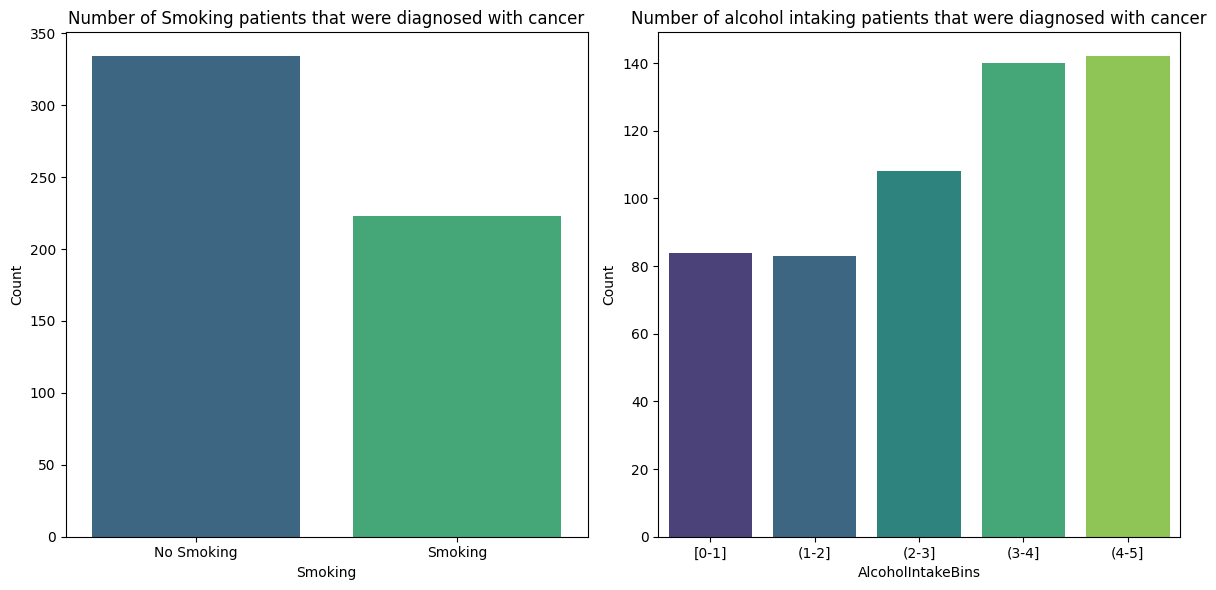

In [10]:
smoking_mappings = {
    0: "No Smoking",
    1: "Smoking"
}

if is_numeric_dtype(positive_diagnosis["Smoking"]):
    positive_diagnosis["Smoking"] = positive_diagnosis["Smoking"].map(smoking_mappings)


bins = [0, 1, 2, 3, 4, 5]
labels = ["[0-1]", "(1-2]", "(2-3]", "(3-4]", "(4-5]"]
positive_diagnosis["AlcoholIntakeBins"] = pd.cut(positive_diagnosis["AlcoholIntake"], bins=bins, labels=labels, include_lowest=True)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x="Smoking", data=positive_diagnosis, hue=positive_diagnosis["Smoking"], palette="viridis")
plt.title("Number of Smoking patients that were diagnosed with cancer")
plt.ylabel("Count")


# Prepare bins for AlcoholIntake
plt.subplot(1, 2, 2)
sns.countplot(x="AlcoholIntakeBins", data=positive_diagnosis, hue=positive_diagnosis["AlcoholIntakeBins"], palette="viridis")
plt.title("Number of alcohol intaking patients that were diagnosed with cancer")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

Conclusions:
- Surprisingly, more pantients that do not smoke were diagnosed with cancer in comparison with the number of patients that do smoke.
- The more units of alcohol the patient consumes, the higher the chances of developing cancer.

## Feature engineering

Because PhysicalActivity does'n seem to have any correlationship at all with the Diagnosis we drop that column.

In [11]:
cancer_data = cancer_data.drop("PhysicalActivity", axis=1)

cancer_data.head()

,Age,Gender,BMI,Smoking,GeneticRisk,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,4.148219,1,1
1,71,0,30.828784,0,1,3.519683,0,0
2,48,1,38.785084,0,2,4.728368,0,1
3,34,0,30.040296,0,0,2.044636,0,0
4,62,1,35.479721,0,0,3.309849,0,1


We create a new feature by adding togheter two factors that could potentially increase the probability of being diganosed with cancer, wich are "Smoking" and "AlcoholIntake"".

In [12]:
cancer_data["SubstancesConsumption"] = cancer_data["AlcoholIntake"] + cancer_data["Smoking"]

correlations_matrix = cancer_data.corr()
correlations_matrix["Diagnosis"].sort_values(ascending=False)

Diagnosis                1.000000
CancerHistory            0.392188
SubstancesConsumption    0.270945
GeneticRisk              0.253472
Gender                   0.250336
Smoking                  0.226999
AlcoholIntake            0.212772
Age                      0.196603
BMI                      0.187560
Name: Diagnosis, dtype: float64

Our new feature high a slighly higher correrlation than the two features separated.

## Data preprocessing

In [13]:
x = cancer_data.drop(["Diagnosis"], axis=1)
y = cancer_data["Diagnosis"]

x.head()

,Age,Gender,BMI,Smoking,GeneticRisk,AlcoholIntake,CancerHistory,SubstancesConsumption
0,58,1,16.085313,0,1,4.148219,1,4.148219
1,71,0,30.828784,0,1,3.519683,0,3.519683
2,48,1,38.785084,0,2,4.728368,0,4.728368
3,34,0,30.040296,0,0,2.044636,0,2.044636
4,62,1,35.479721,0,0,3.309849,0,3.309849


In [14]:
random_seed = random.randint(1, 100)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_seed)


x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=random_seed)

## Feature scaling

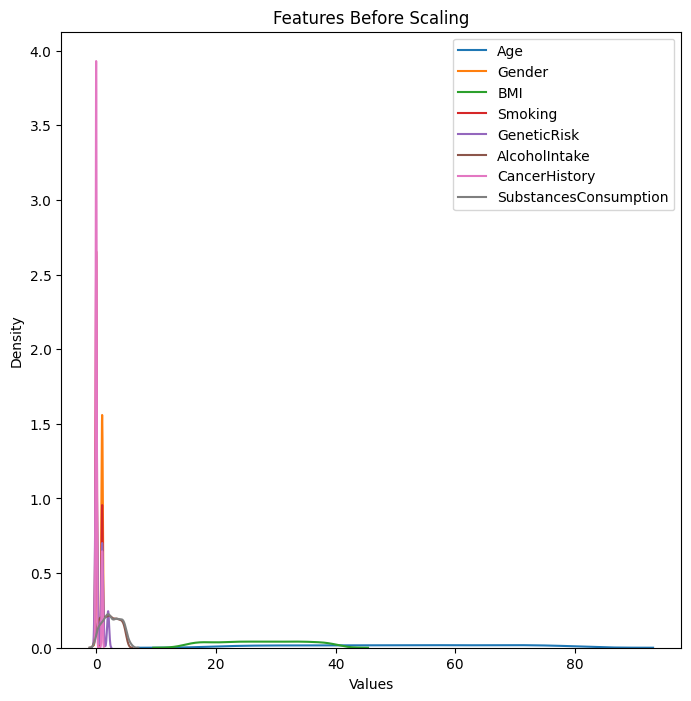

In [15]:
plt.figure(figsize=(8, 8))
plt.title("Features Before Scaling")
plt.xlabel("Values")

for column in x_train.columns:
    sns.kdeplot(x_train[column], label=column, clip=(-50, 100))

plt.legend()
plt.show()

In [16]:
scaler = MaxAbsScaler()

# Prevent the scaler from converting our DataFrame into a NumpyArray
for column in x_train.columns:
    scaler.fit(x[[column]])
    x_train[column] = scaler.transform(x_train[[column]])
    x_val[column] = scaler.transform(x_val[[column]])
    x_test[column] = scaler.transform(x_test[[column]])
    

x_train.head()

,Age,Gender,BMI,Smoking,GeneticRisk,AlcoholIntake,CancerHistory,SubstancesConsumption
489,0.4500,0.0,0.470015,0.0,1.0,0.857319,0.0,0.716890
1365,0.7000,0.0,0.980291,0.0,0.0,0.216197,0.0,0.180784
576,0.9250,0.0,0.991093,0.0,1.0,0.284028,0.0,0.237505
774,0.3875,1.0,0.755721,1.0,0.0,0.206606,0.0,0.340436
426,0.6625,1.0,0.562284,1.0,0.0,0.517582,1.0,0.600474


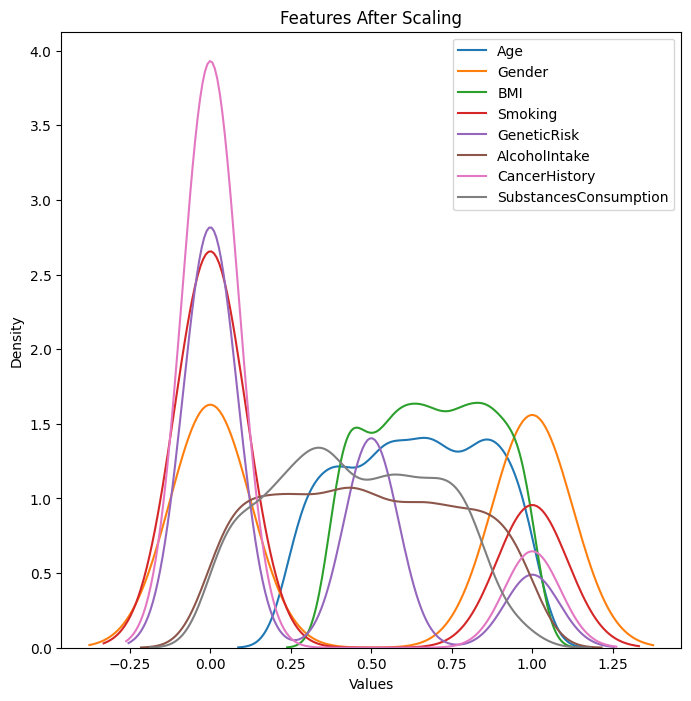

In [17]:
plt.figure(figsize=(8, 8))
plt.title("Features After Scaling")
plt.xlabel("Values")

for column in x_train.columns:
    sns.kdeplot(x_train[column], label=column, clip=(-50, 100))

plt.legend()
plt.show()

## Model training and selection

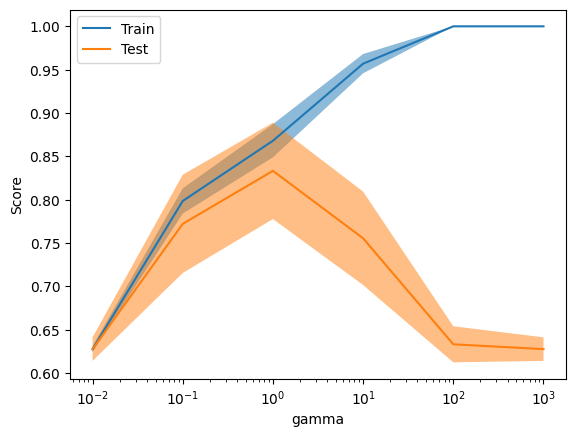

In [18]:
ValidationCurveDisplay.from_estimator(
   svm.SVC(kernel="rbf"), x_val, y_val, param_name="gamma", param_range=np.logspace(-2, 3, 6)
)

Conclusions:
- After testing multiple values for gamma in a log space between 1e-2 and 1e3, we found that the best value for gamma is around 1e0, after that the model starts to overfit the Train set and underfits the Test set

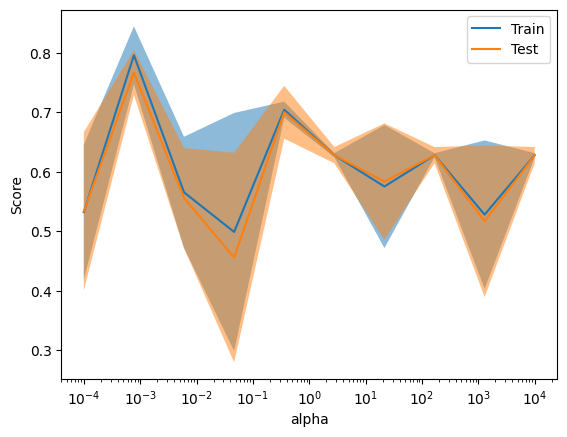

In [19]:
ValidationCurveDisplay.from_estimator(
   SGDClassifier(
      loss="squared_error",
      max_iter=10000
   ),
   x_val, 
   y_val, 
   param_name="alpha", 
   param_range=np.logspace(-4, 4, 10),
)

Conclusions:
- After testing different values for the learning rate (Alpha) we foudnd that the best values is between 1e-4 and 1e-3, after that the model doesn't overfits or unerfits any of the sets, but the accuracy starts to decrease.

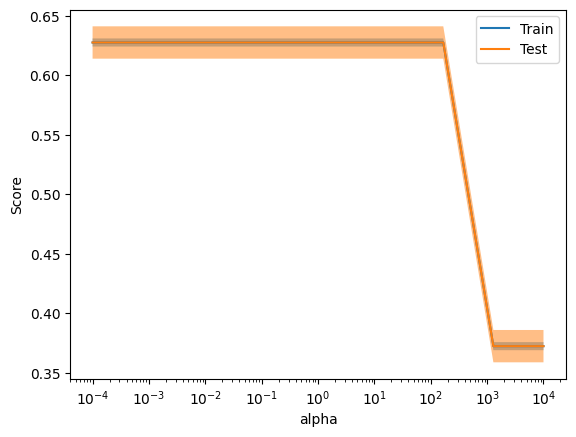

In [70]:
ValidationCurveDisplay.from_estimator(
    neural_network.MLPClassifier(
        solver="sgd",
        hidden_layer_sizes=(64, 32),
        random_state=1,
        max_iter=100
    ),
    x_val, 
    y_val, 
    param_name="alpha", 
    param_range=np.logspace(-4, 4, 10),
)

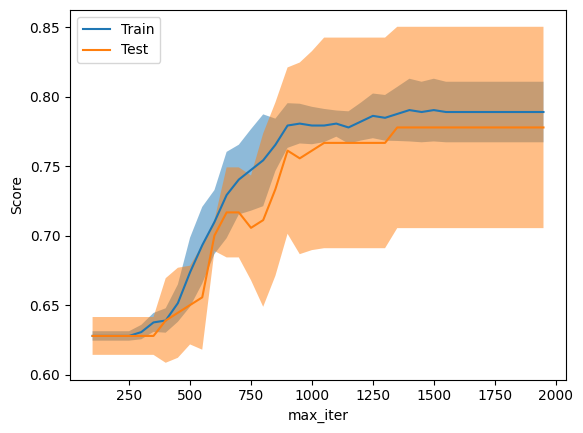

In [66]:
ValidationCurveDisplay.from_estimator(
    neural_network.MLPClassifier(
        solver="sgd",
        hidden_layer_sizes=(64, 32),
        random_state=1
    ),
    x_val, 
    y_val, 
    param_name="max_iter", 
    param_range=np.arange(100, 2000, 50),
)

Conclusions:
- For the Neural Network varing the learning rate (Alpha) didn't have much of an impact in the model's acuracy, actuallly when the learning rate reached 1e2 the acuracy drastically dicreased.
- For the number of iterations the model actually saw a poisitive increase on it's performance, starting after the 250 iterations until reaching 1300, after that the model ddidn't have any improvement.

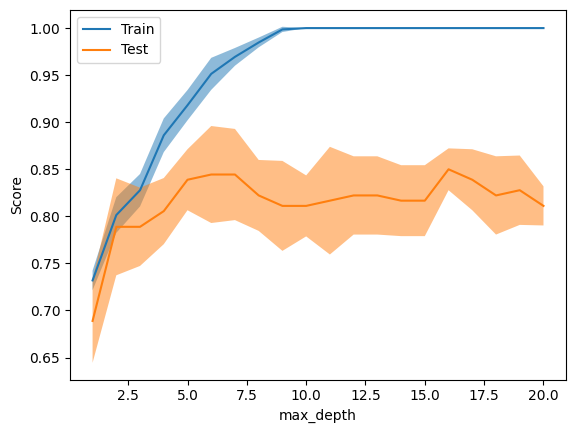

In [36]:
ValidationCurveDisplay.from_estimator(
    tree.DecisionTreeClassifier(),
    x_val, 
    y_val, 
    param_name="max_depth", 
    param_range=np.arange(1, 21),
)

Conclusions:
- For the Decision Tree we see that the most optimal value for the max depth parameter is around 4.5 annd 5.5, after that the acuracy in the Train set starts to increase drastically, indicating an overfitting, while the acuracy for the Test set remains more or less the same

In [74]:
models = {
    "SVC": svm.SVC(kernel="rbf", gamma=1.0),
    "SGDC": SGDClassifier(
      loss="squared_error",
      max_iter=10000,
      alpha=0.001
   ),
   "MLPC": neural_network.MLPClassifier(
        solver="sgd",
        hidden_layer_sizes=(64, 32),
        random_state=1,
        max_iter=1400,
        alpha=1.0
    ),
    "Decision Tree": tree.DecisionTreeClassifier(max_depth=5),
}

**** Model SVC ****
Model Accuracy: 0.8466666666666667
Confusion Matrix:
[[164  11]
 [ 35  90]]



**** Model SGDC ****
Model Accuracy: 0.8233333333333334
Confusion Matrix:
[[158  17]
 [ 36  89]]



**** Model MLPC ****
Model Accuracy: 0.81
Confusion Matrix:
[[160  15]
 [ 42  83]]



**** Model Decision Tree ****
Model Accuracy: 0.81
Confusion Matrix:
[[161  14]
 [ 43  82]]





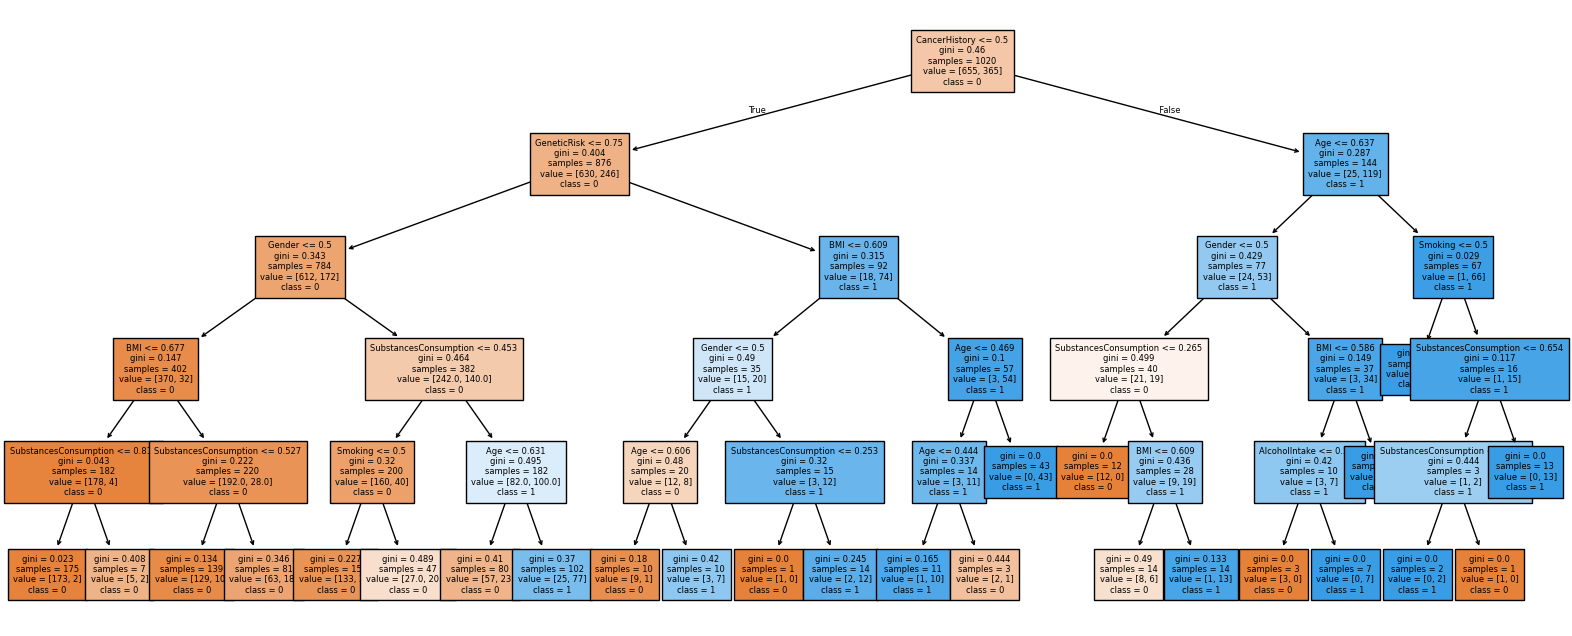

In [76]:
for name, model in models.items():
    print(f"**** Model {name} ****")

    model.fit(x_train, y_train)

    if name == "Decision Tree":
        feature_names = list(x_train.columns.values)
        class_names = [str(value) for value in y_train.unique()]
        plt.figure(figsize=(20,8))
        tree.plot_tree(
            model, 
            filled=True,
            feature_names=feature_names, 
            max_depth=5, 
            fontsize=6, 
            class_names=class_names
        )

    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy}")

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\n\n")

## Conclusions

- All 4 models had an acuracy higher than 80%.

- The model with the best performance was the Support Vectro Classifier followed by the Multi Layer Perceptron Classifier.

- The DecisionTree seems to relay in the newly created feature "SubstanceComsuption" in order to make decisions.

- After experimenting with multiple values for the number of hidden layers and the number of neuros per hidden layer for the MLPC (Between (2, 5) and (64, 64)) the most optimal value for the MLPC was (64, 32).

- Further experimentation with the number of hidden layers and the number of neurons would be helpful to find better values for the MLPC.